<a href="https://colab.research.google.com/github/austinmula/ML---Classes/blob/master/ConvolutionNeuralNetworksForVision_Multi_Classification_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intoduction
Create a CNN also known as a convnet or convolutional Neural Networks.
- Computer Vision aspplications
- Recognize handwritten digits and characters
-Recognize objects in images and videos
-Non vision applications -Natural Language Processing, Recommender systems

## Dataset
- 60, 000 labeled digital images - training data and 10,000 for testing.
- Each image is 28 by 28 pixels - 784 features represented using Numpy Arrays - grayscale pixel intensity (0-255)
- Convent - probablistic classification.
- It will tell us what is the probability of a digit being a 0,1,2,3,4,5,6,7,8,9 - The highest probability(closest to 1) is the predicted value.

In [ ]:
28 * 28

784

# Reproducibility in Keras and Deep Leaning

-Computations are done in parallel (Keras does parallel computing for floating point calcualtions)
- Can produce different results in each execution. 

## Loading the Data

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_Test, y_test) = mnist.load_data()

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[4:10]

array([9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
X_train.shape

(60000, 28, 28)

# Visualize the Digits

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

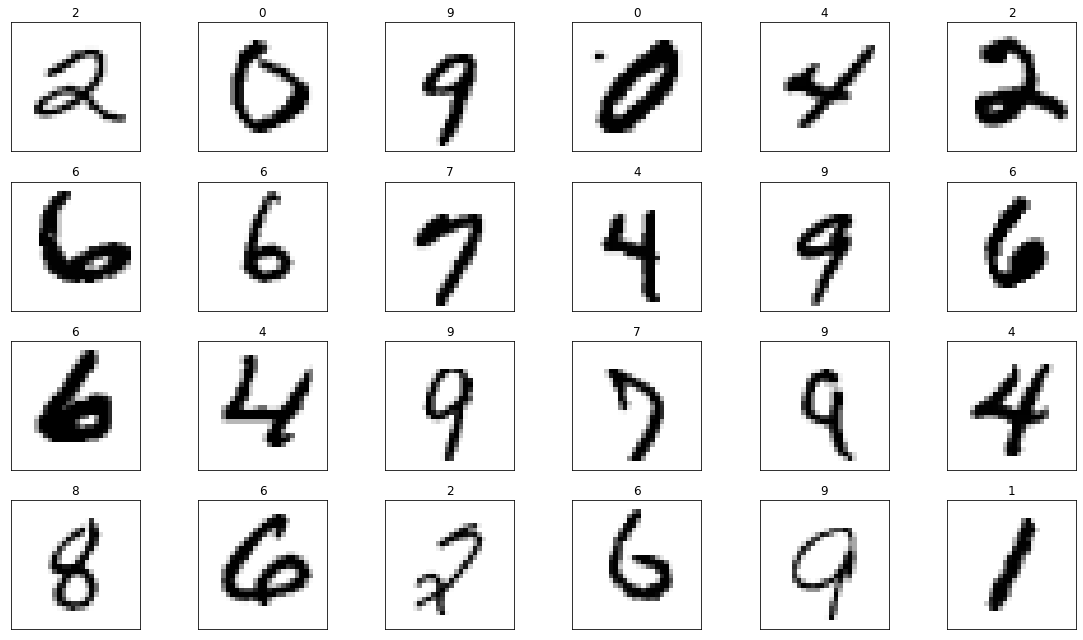

In [ ]:
index = np.random.choice(np.arange(len(X_train)), 24, replace = False) # 24 inde
figure,axes = plt.subplots(nrows = 4, ncols = 6, figsize = (16,9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image,target = item
    axes.imshow(image, cmap = plt.cm.gray_r)
    axes.set_xticks([]) # removes the x-axis marks
    axes.set_yticks([]) # remove the y-axis marks
    axes.set_title(target)

plt.tight_layout()

# Data Preparation
- In Scikit learn, the datasets are bundled and are preprocessed into shapes that the models require
- Keras - convnet - Some preparation need to be done for data to work here - the dataset MNIST will need to be prepared
- Keras expects a Numpy array as inputs
- Each sample must have the shape
 - (width, height, channel) 
 - Each pixwl has one channel for the grayscale 0-255 the sample shades are (28,28,1)
 - Therefore the data needs to be reshaped 
-Neural Networks learn from the shapes.
- As the Neural Network learns from the images, it creates more channels.
 - The channel will represent more complex features i.e. edges, curves and lines
 -Enable the network to recognize digits based on the features and how they are combined

# Reshaping the Image Data

In [ ]:
X_train = X_train.reshape((60000, 28, 28, 1)) # (width, height, channel)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_Test = X_Test.reshape((10000, 28, 28, 1))

In [ ]:
X_Test.shape

(10000, 28, 28, 1)

In [ ]:
X_train[0]
# We need to normalize the data beacuse the data ranges very widely 0 - 255..

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

# Normalizing the image Data
Numeric features - could varry widely 28*28 = 784. Deep learning performs better on data that is normalized
- 0.0 - 1.0
- a range for which the data mean is 0.0 and Standard Devialtion is 1.0 
 - To achieve this, Divide each pixel value by 255 to noramlize to 0.0 - 1.0 RGB(0-255): 0 ,0 , 255

In [ ]:
X_train = X_train.astype('float32')/255
# this will make the data range from 0-1
# check with X_train[0]

In [ ]:
X_Test = X_Test.astype('float32')/255

In [ ]:
y_train[2]

4

In [ ]:
X_train[2]
# This is the pixel representation of the number at position 2
# We need to convert it to an array such that all numbers are zeros except 
# the postion of that data(For y) y_train = 9 -> 000000001 
# at pos 2 y_train = 4 -> one-hot encoding becomes 000100000

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

# One-Hot Encoding: Convert Labels into categorical data.
Prediction for each digit will be an array of 10 probabilities. e.g. 0.8, 0.0, 0.1, 0, ....(10). To evaluate the model accuracy, Keras compares predictions to datasets labels
- Both must have the same shape.
- The MNIST labels are individual integers 0 - 9 We must transform labels into categorical data arrays that matches the prediction format. We use one-hot encoding to convert labels from integers into 10 element arrays of 1.0s and 0.0s Only one element is a 1.0 and the rest are 0.0s (0, 1, 2, ...9): (0, 0.05, 0.5, 0.8, 0.000) >> 0(1) 1(0) 2(0) ... 9(0) tensorflow.keras.utils function to_categorical -- one-hot encoding apples,, lemons,, oranges,,, 1 0

# One-Hot Encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
y_train[2]
# As determined above the value of y_train[2] is shown in cell 18 output
# the one-hot encoded equvallent is shown below

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
len(y_train[2])

10

In [ ]:
y_test = to_categorical(y_test)

In [ ]:
y_test.shape

(10000, 10)

# Creation of a Convolutional Neural Network
- Configure CNN
- Sequential Model - Stack layers to execute sequentially
 - Output of one layer becomes input to the next
 - Feed foward Network
 -(Not all Layers will feed the next layer)

In [ ]:
from tensorflow.keras.models import Sequential as sq

In [ ]:
cnn = sq()

In [ ]:
cnn

# Adding Layers to the network
- A typical convnet has : 
 - An input layer - receives the training samples
 - Hidden layers - that learn from the training samples
 - Output layer - produces predictions 

- We import the layers from a basic convnet

In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

# Start by Adding the Convolution layer
- This layer uses the relationship between pixels that are in close proximity so as to learn usefull features/patterns.
- The features that it learns become input for subsequet layers

- We will exmine the convolution on a 6 by 6 image.
- 3 by 3 represents the kernel
- The convolution performs calculations that run from the kernels 9 features and outputs one new feature
- Convolution diagram - 3 by 3 represent its initial position

- **Complete Pass** that goes from left to right then top to bottom is a **filter**
- if you have a 3*3 kernel, the

In [ ]:
#Adding conv2D which implements a convolutional layer (layer 1)
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))